<a href="https://colab.research.google.com/github/sodiq-sulaimon/Preparations-for-TensorFlow-Developer-Certification/blob/main/Convolution_Neural_Network/Dogs_vs_Cats_classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download and Inspect the dataset

In [ ]:
# Download the dataset
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-10-16 00:30:57--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.3’

cats_and_dogs_filte 100%[===================>]  65.43M   134MB/s    in 0.5s    

2023-10-16 00:30:58 (134 MB/s) - ‘cats_and_dogs_filtered.zip.3’ saved [68606236/68606236]



In [ ]:
# Extract the dataset to the current directory
import zipfile

# unzip the file
zip_ref = zipfile.ZipFile('./cats_and_dogs_filtered.zip', 'r')
zip_ref.extractall()

zip_ref.close()

In [ ]:
# Let's look at the files in the directories
import os

base_dir = 'cats_and_dogs_filtered'
print(f'Content of base directory: {os.listdir(base_dir)}')

print('\nContent of train directory:', os.listdir(f'{base_dir}/train'))
print ('\nContent of validation directory :', os.listdir(f'{base_dir}/validation'))

Content of base directory: ['train', 'vectorize.py', 'validation']

Content of train directory: ['dogs', 'cats']

Content of validation directory : ['dogs', 'cats']


In [ ]:
# Assign the directories to variables to use later
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training images
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation images
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
# Let's see what the filenames look like in the dataset
train_cat_fname = os.listdir(train_cats_dir)
train_dog_fname = os.listdir(train_dogs_dir)

print(train_cat_fname[:5])
print(train_dog_fname[:5])

['cat.308.jpg', 'cat.400.jpg', 'cat.961.jpg', 'cat.942.jpg', 'cat.875.jpg']
['dog.785.jpg', 'dog.633.jpg', 'dog.643.jpg', 'dog.852.jpg', 'dog.306.jpg']


In [ ]:
# Let's find out the total number of the train and validation datasets
print(f'Total training cat images: {len(os.listdir(train_cats_dir))}')
print(f'Total training dogs images: {len(os.listdir(train_dogs_dir))}')

print(f'Total validation cat images: {len(os.listdir(validation_cats_dir))}')
print(f'Total validation dogs images: {len(os.listdir(validation_cats_dir))}')

Total training cat images: 1000
Total training dogs images: 1000
Total validation cat images: 500
Total validation dogs images: 500


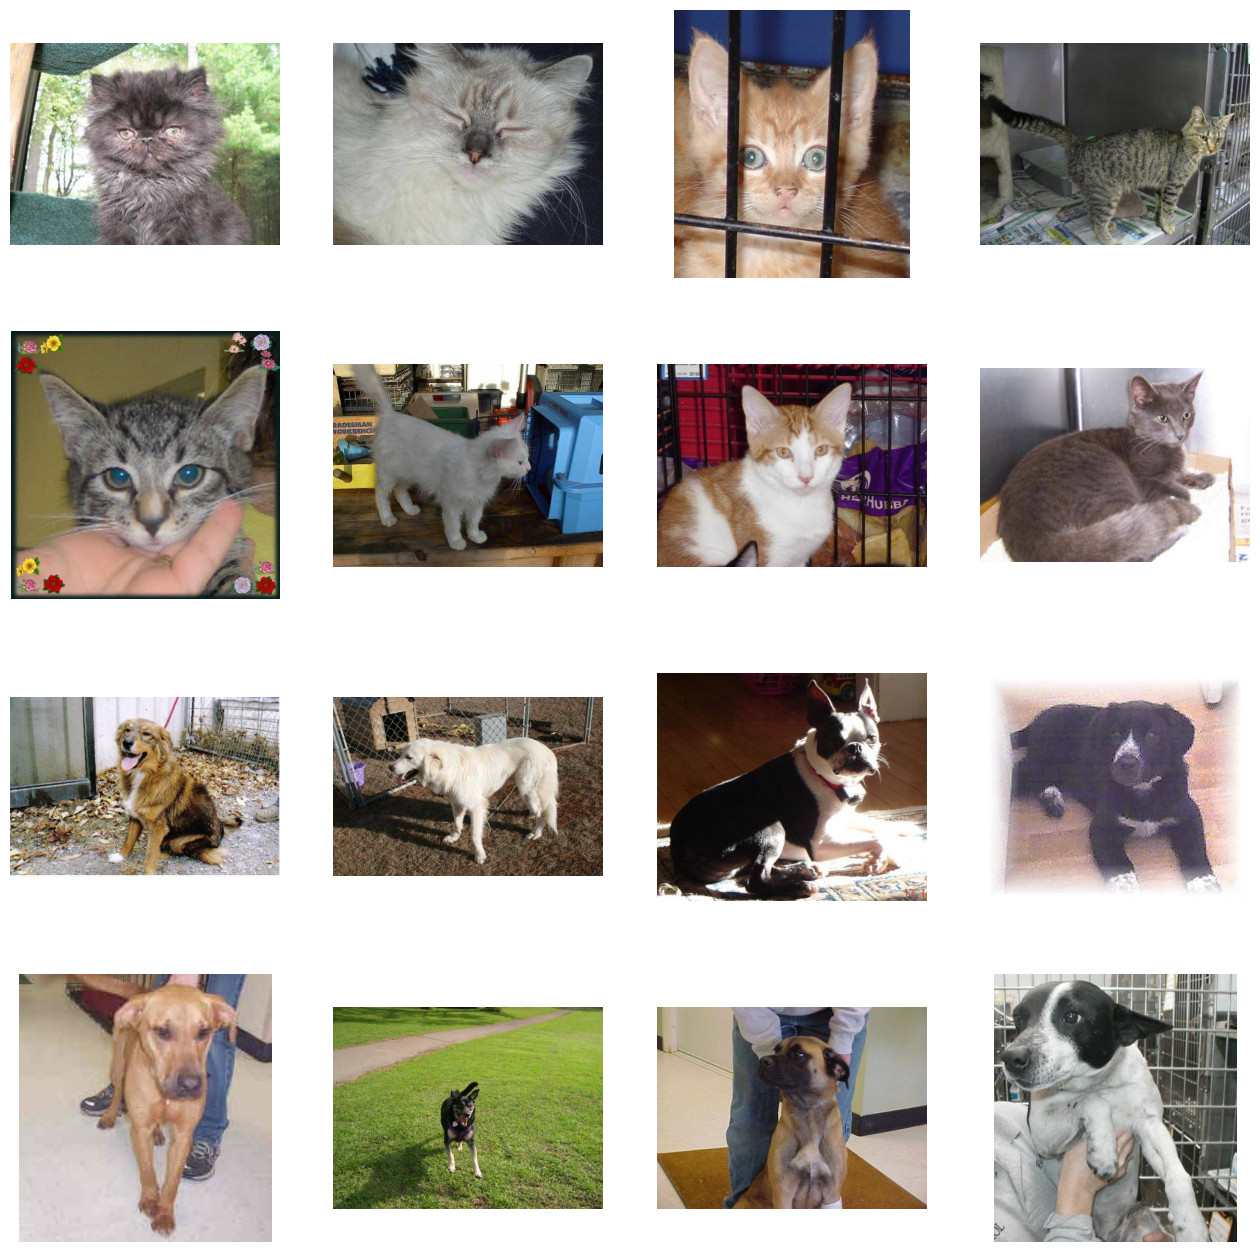

In [ ]:
# Let's take a look at a few pictures of the cats and dogs in the datasets

%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(16, 16)

pic_index = 0 # Index for iterating over images
pic_index += 8
nrows = 4
ncols = 4

next_cat_pix = [os.path.join(train_cats_dir, fname) for fname in train_cat_fname[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) for fname in train_dog_fname[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices starts at 1
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

Building a small model from scratch

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = tf.keras.models.Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Data Preprocessing

In [ ]:
# Prepocess the data with ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)

# Flow the training images in batches of 20
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode = 'binary',
                                                    target_size=(150, 150))

# Flow the validation images in batches of 20
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                    batch_size=20,
                                                    class_mode = 'binary',
                                                    target_size=(150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Training

In [ ]:
history = model.fit(train_generator, epochs=15,
                    validation_data=validation_generator,
                    verbose=2)

Epoch 1/15
100/100 - 11s - loss: 0.8901 - accuracy: 0.5470 - val_loss: 0.6940 - val_accuracy: 0.5160 - 11s/epoch - 113ms/step
Epoch 2/15
100/100 - 6s - loss: 0.6502 - accuracy: 0.6095 - val_loss: 0.6032 - val_accuracy: 0.6760 - 6s/epoch - 57ms/step
Epoch 3/15
100/100 - 6s - loss: 0.5726 - accuracy: 0.7045 - val_loss: 0.5789 - val_accuracy: 0.7040 - 6s/epoch - 56ms/step
Epoch 4/15
100/100 - 5s - loss: 0.5059 - accuracy: 0.7365 - val_loss: 0.5841 - val_accuracy: 0.6870 - 5s/epoch - 46ms/step
Epoch 5/15
100/100 - 6s - loss: 0.4351 - accuracy: 0.7950 - val_loss: 0.6092 - val_accuracy: 0.6550 - 6s/epoch - 56ms/step
Epoch 6/15
100/100 - 5s - loss: 0.3727 - accuracy: 0.8315 - val_loss: 0.5451 - val_accuracy: 0.7450 - 5s/epoch - 47ms/step
Epoch 7/15
100/100 - 5s - loss: 0.2841 - accuracy: 0.8795 - val_loss: 0.6155 - val_accuracy: 0.7270 - 5s/epoch - 54ms/step
Epoch 8/15
100/100 - 5s - loss: 0.2145 - accuracy: 0.9075 - val_loss: 0.7087 - val_accuracy: 0.6910 - 5s/epoch - 48ms/step
Epoch 9/15
10

Model Prediction

In [ ]:
import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for filename in uploaded.keys():
  path = '/content/' + filename
  img = load_img(path, target_size=(150, 150))

  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print(filename + "is a dog")
  else:
    print(filename + "is a cat")

Saving cat01.jpeg to cat01 (1).jpeg
Saving cat02.jpeg to cat02 (1).jpeg
Saving dog1.jpeg to dog1 (1).jpeg
Saving dog02.jpeg to dog02.jpeg
Saving puppy.jpeg to puppy.jpeg
1/1 [==============================] - 0s 213ms/step
[0.00030776]
cat01 (1).jpegis a cat
1/1 [==============================] - 0s 27ms/step
[5.99796e-06]
cat02 (1).jpegis a cat
1/1 [==============================] - 0s 18ms/step
[0.01312005]
dog1 (1).jpegis a cat
1/1 [==============================] - 0s 20ms/step
[1.]
dog02.jpegis a dog
1/1 [==============================] - 0s 19ms/step
[0.9955511]
puppy.jpegis a dog


Visualizing intermediate representations

1/1 [==============================] - 0s 153ms/step


<ipython-input-28-f5074278bb90>:47: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()


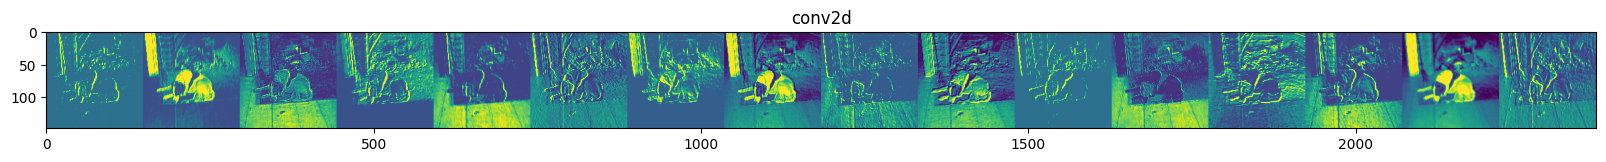

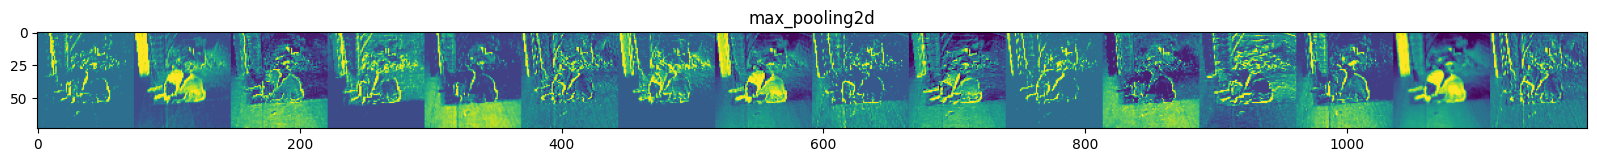

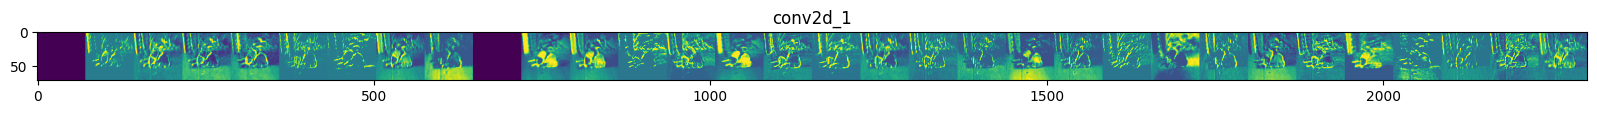

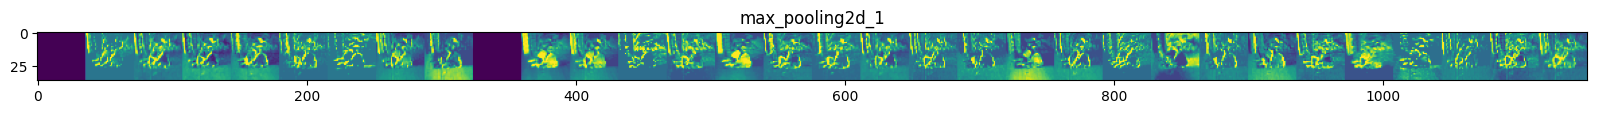

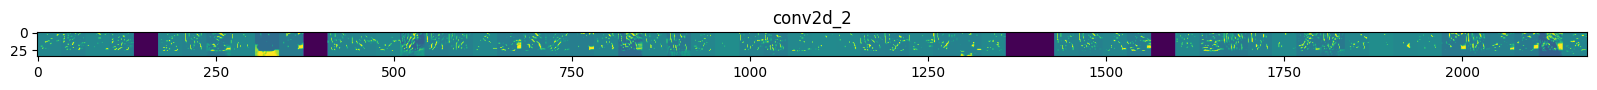

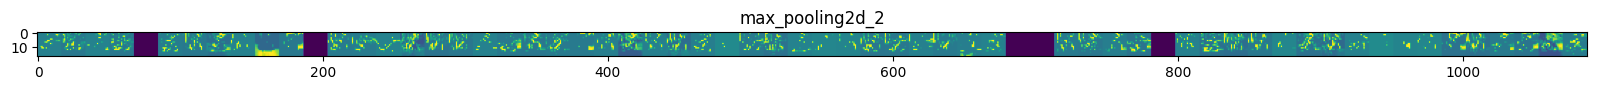

In [ ]:
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fname]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fname]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):

  if len(feature_map.shape) == 4:

    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))

    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

Evaluating Accuracy and Loss for the Model

Text(0.5, 1.0, 'Training and validation loss')

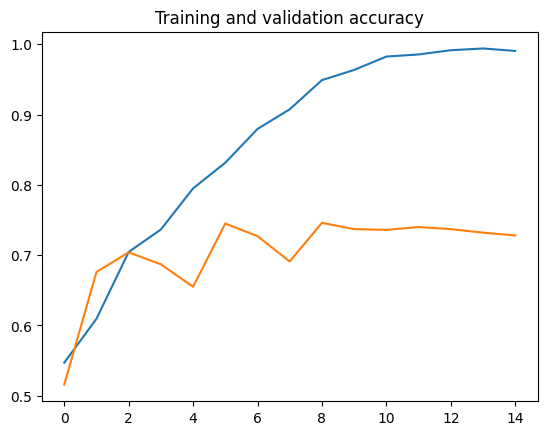

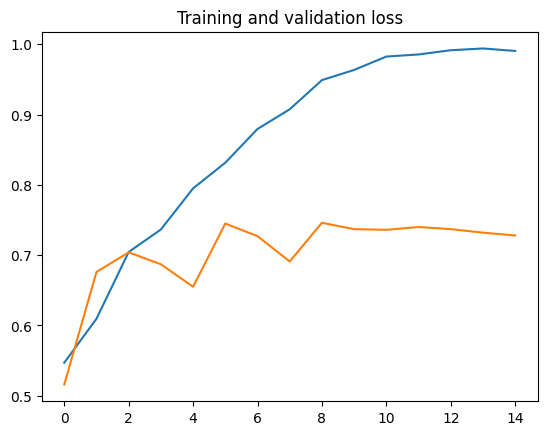

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation loss')